### üéØ Cel biznesowy:
Model powinien na podstawie cech wizualnych odkrywaƒá naturalne struktury w danych i utworzyƒá grupy (np. odpowiadajƒÖce gatunkowm meduz)
- barrel_jellyfish
- blue_jellyfish
- compass_jellyfish
- lions_mane_jellyfish
- mauve_stinger_jellyfish
- Moon_jellyfish

Celem jest wykrywanie niekoniecznie wykrywanie gatunk√≥w meduz ale znaleznienie wsp√≥lnych cech na podstawie klasteryzacji.


Wy≈õwietlanie przyk≈Çadowych obrazk√≥w z ka≈ºdego gatunku meduzy...


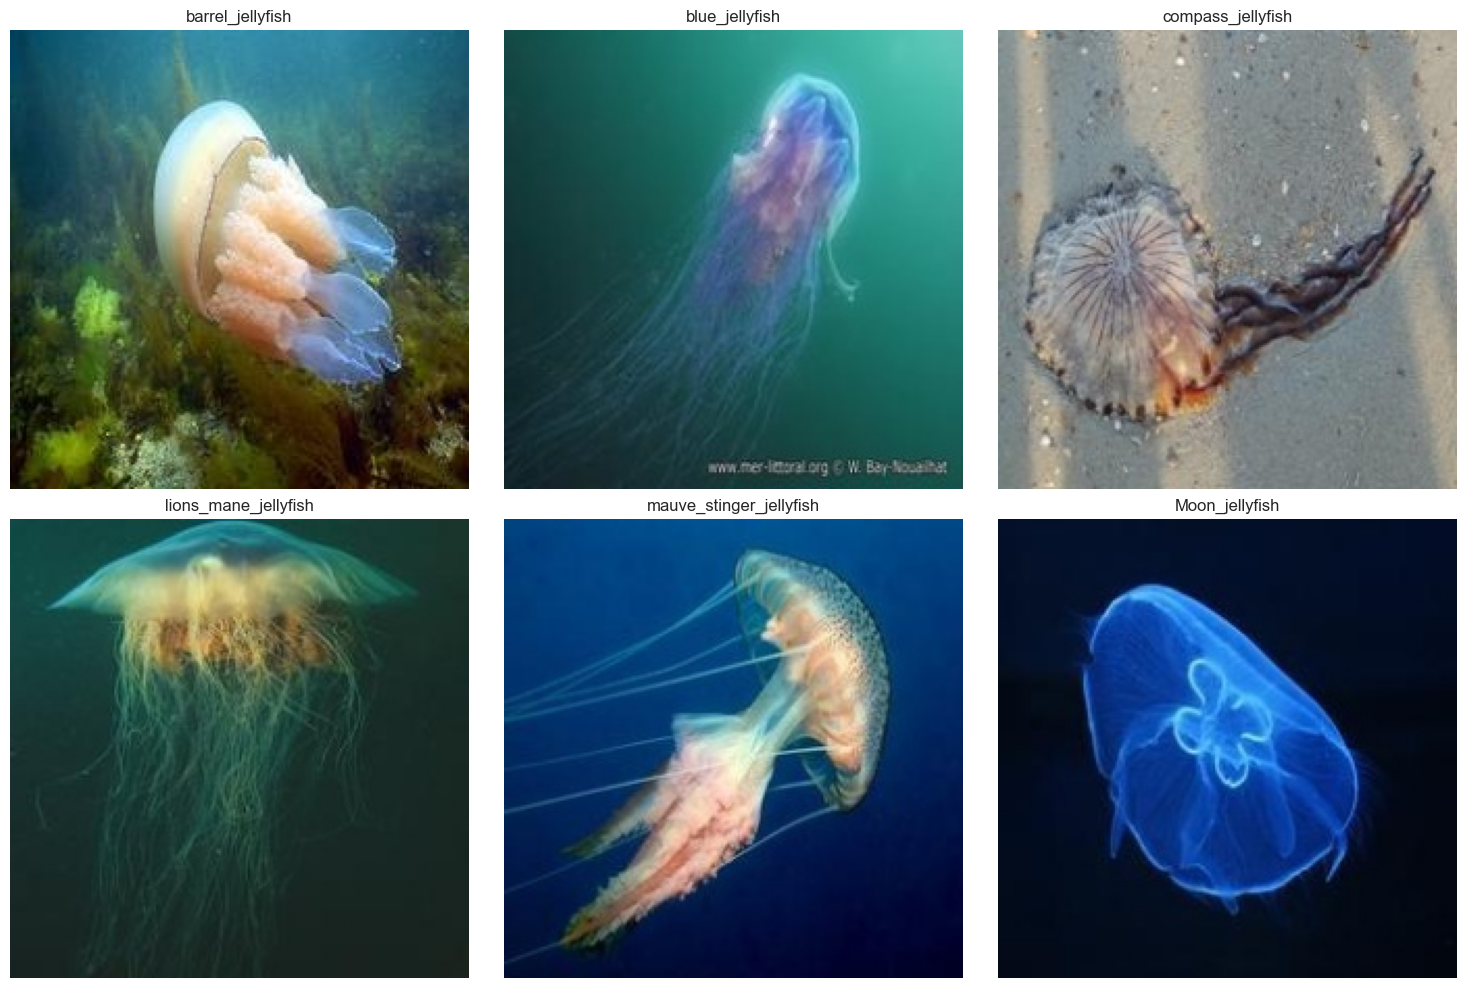

In [74]:
def show_sample_images():
    print("\nWy≈õwietlanie przyk≈Çadowych obrazk√≥w z ka≈ºdego gatunku meduzy...")
    plt.figure(figsize=(15, 10))
    for i, species in enumerate(species_folders):
        species_dir = os.path.join(DATA_DIR, species)
        sample_file = os.listdir(species_dir)[0]
        img = Image.open(os.path.join(species_dir, sample_file))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(species)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images()

≈ÅƒÖczna liczba zdjƒôƒá w zbiorze treningowym: 882
≈ÅƒÖczna liczba zdjƒôƒá w zbiorze testowym: 37
≈ÅƒÖczna liczba zdjƒôƒá w zbiorze walidacyjnym: 37


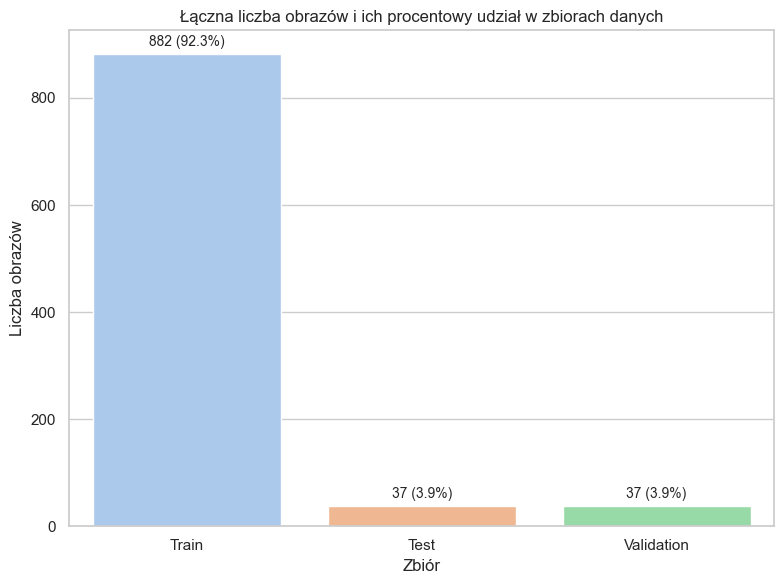

In [75]:
# Liczenie ≈ÇƒÖcznej liczby zdjƒôƒá w ka≈ºdym zbiorze - bez podzialu na klasy
# Liczenie ≈ÇƒÖcznej liczby zdjƒôƒá w ka≈ºdym zbiorze

def total_images_in_dataset(files_dict):
    return sum(len(paths) for paths in files_dict.values())

train_total = total_images_in_dataset(train_files)
test_total = total_images_in_dataset(test_files)
valid_total = total_images_in_dataset(valid_files)
total_all = train_total + test_total + valid_total

print("≈ÅƒÖczna liczba zdjƒôƒá w zbiorze treningowym:", train_total)
print("≈ÅƒÖczna liczba zdjƒôƒá w zbiorze testowym:", test_total)
print("≈ÅƒÖczna liczba zdjƒôƒá w zbiorze walidacyjnym:", valid_total)

total_all = train_total + test_total + valid_total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'Zbi√≥r': ['Train', 'Test', 'Validation'],
    'Liczba obraz√≥w': [train_total, test_total, valid_total],
})

df['% ca≈Ço≈õci'] = df['Liczba obraz√≥w'] / total_all * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Zbi√≥r', y='Liczba obraz√≥w', hue='Zbi√≥r', palette='pastel', legend=False)

for i, row in df.iterrows():
    plt.text(i, row['Liczba obraz√≥w'] + total_all * 0.01, 
             f"{row['Liczba obraz√≥w']} ({row['% ca≈Ço≈õci']:.1f}%)", 
             ha='center', va='bottom', fontsize=10)

plt.title('≈ÅƒÖczna liczba obraz√≥w i ich procentowy udzia≈Ç w zbiorach danych')
plt.tight_layout()
plt.show()


### Histogramy kolor√≥w (RGB)

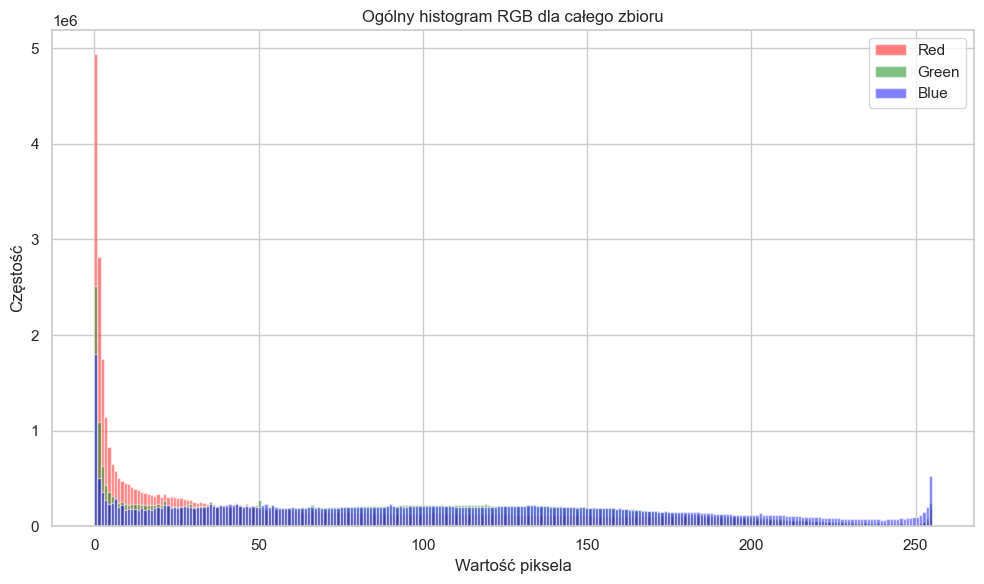

In [76]:
#Histogram RGB 

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# ≈öcie≈ºka do katalog√≥w treningowego, testowego i walidacyjnego
train_path = 'DATA/Train_Test_Valid/Train'
test_path = 'DATA/Train_Test_Valid/Test'
valid_path = 'DATA/Train_Test_Valid/Valid'

# Zbieramy wszystkie pliki .jpg w podkatalogach dla wszystkich trzech zbior√≥w
image_paths = glob.glob(os.path.join(train_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(test_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(valid_path, '**', '*.jpg'), recursive=True)

# Inicjalizacja pustych list na kana≈Çy RGB
all_r = []
all_g = []
all_b = []

# Przechodzimy przez wszystkie obrazy i zbieramy dane RGB
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Nie mo≈ºna za≈Çadowaƒá obrazu: {image_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)
    all_r.append(r.ravel())
    all_g.append(g.ravel())
    all_b.append(b.ravel())

# ≈ÅƒÖczymy wszystkie warto≈õci w jeden wektor na ka≈ºdy kana≈Ç
all_r = np.concatenate(all_r)
all_g = np.concatenate(all_g)
all_b = np.concatenate(all_b)

# Tworzymy wykres histogramu
plt.figure(figsize=(10, 6))
plt.hist(all_r, bins=256, color='red', alpha=0.5, label='Red')
plt.hist(all_g, bins=256, color='green', alpha=0.5, label='Green')
plt.hist(all_b, bins=256, color='blue', alpha=0.5, label='Blue')
plt.title('Og√≥lny histogram RGB dla ca≈Çego zbioru')
plt.xlabel('Warto≈õƒá piksela')
plt.ylabel('Czƒôsto≈õƒá')
plt.legend()
plt.tight_layout()
plt.show()


Tworzenie histogramu dla klasy: mauve_stinger_jellyfish


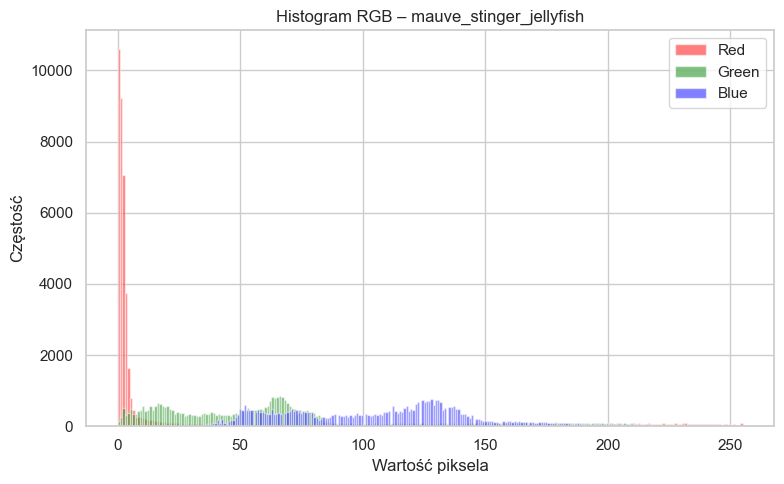

Tworzenie histogramu dla klasy: compass_jellyfish


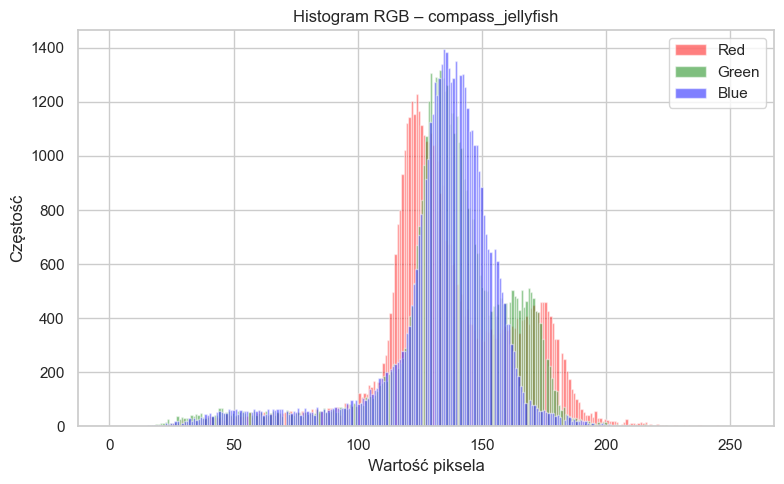

Tworzenie histogramu dla klasy: lions_mane_jellyfish


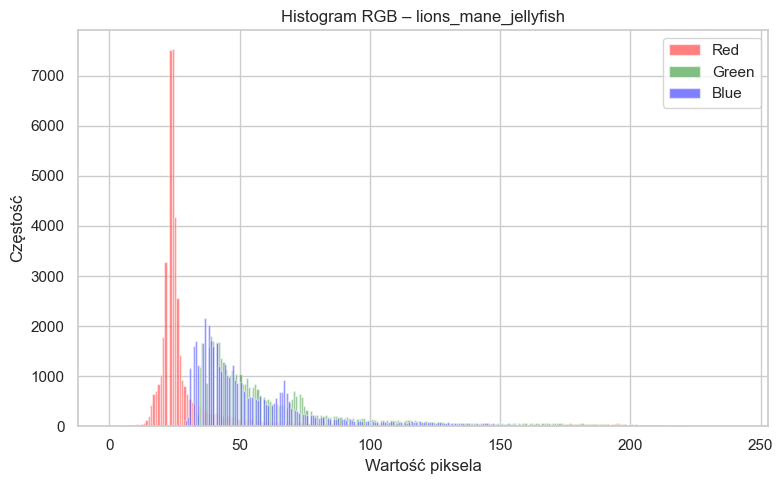

Tworzenie histogramu dla klasy: blue_jellyfish


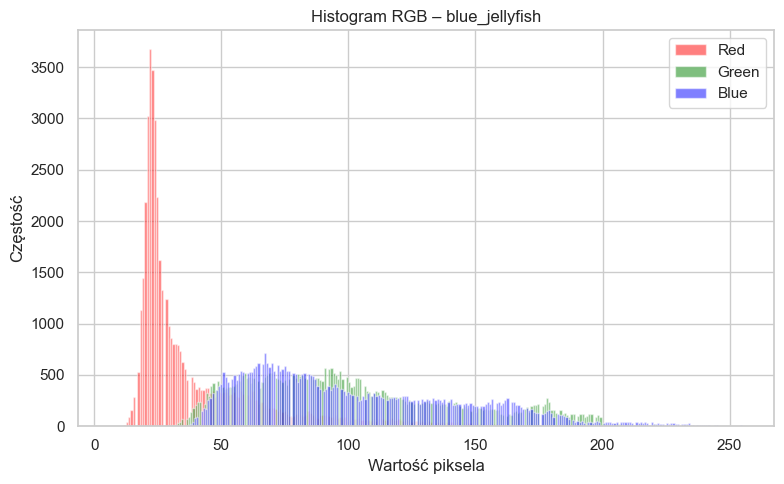

Tworzenie histogramu dla klasy: Moon_jellyfish


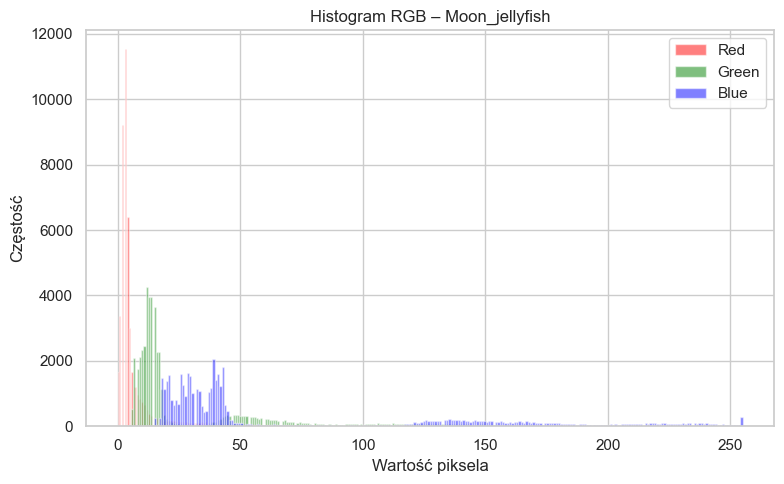

Tworzenie histogramu dla klasy: barrel_jellyfish


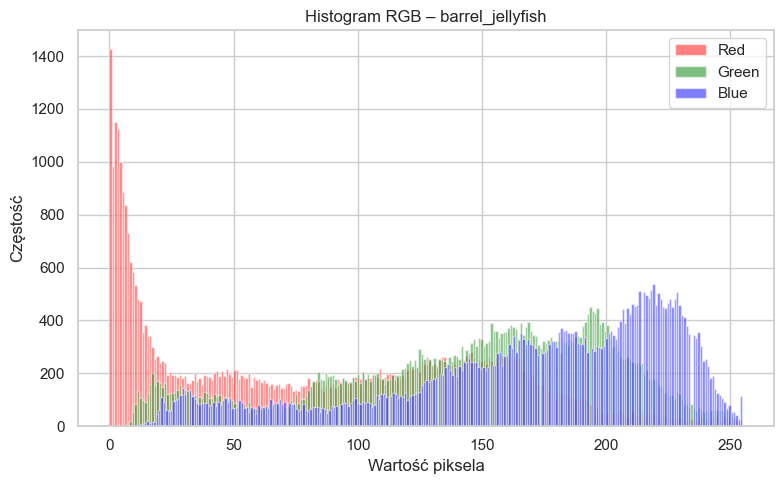

In [ ]:
#Hisgramy RGB z podzia≈Çem na klasy (≈ºeby zobaczyƒá czy sƒÖ jakie≈õ widoczne r√≥znice)

# ≈öcie≈ºki do katalog√≥w treningowego, testowego i walidacyjnego
train_path = 'DATA/Train_Test_Valid/Train'
test_path = 'DATA/Train_Test_Valid/Test'
valid_path = 'DATA/Train_Test_Valid/Valid'

# Lista klas (folder√≥w) we wszystkich trzech zbiorach
def get_classes(path):
    return [cls for cls in os.listdir(path) if os.path.isdir(os.path.join(path, cls))]

# Funkcja: rysuj histogram RGB dla jednego obrazu
def plot_rgb_histogram(image_path, class_name):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Nie mo≈ºna za≈Çadowaƒá obrazu: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)
    
    plt.figure(figsize=(8, 5))
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.title(f'Histogram RGB ‚Äì {class_name}')
    plt.xlabel('Warto≈õƒá piksela')
    plt.ylabel('Czƒôsto≈õƒá')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Zbieramy klasy z ka≈ºdego zbioru
train_classes = get_classes(train_path)
test_classes = get_classes(test_path)
valid_classes = get_classes(valid_path)

# Upewniamy siƒô, ≈ºe klasy sƒÖ wsp√≥lne dla wszystkich zbior√≥w
common_classes = list(set(train_classes) & set(test_classes) & set(valid_classes))

# Przechodzimy przez wszystkie wsp√≥lne klasy
for class_name in common_classes:
    # Zbieramy ≈õcie≈ºki obraz√≥w dla ka≈ºdej klasy we wszystkich trzech zbiorach
    class_folders = [
        os.path.join(train_path, class_name),
        os.path.join(test_path, class_name),
        os.path.join(valid_path, class_name)
    ]
    
    image_paths = []
    for class_folder in class_folders:
        image_paths.extend(glob.glob(os.path.join(class_folder, '*.jpg')))
    
    if not image_paths:
        print(f"Brak obraz√≥w dla klasy {class_name}")
        continue

    # Wybieramy pierwszy obraz z ka≈ºdej klasy do analizy
    sample_image_path = image_paths[0]
    print(f"Tworzenie histogramu dla klasy: {class_name}")
    plot_rgb_histogram(sample_image_path, class_name)


In [ ]:
base_dir = Path("DATA/Train_Test_Valid")
backup_dir = Path("DATA/Backup")  #tylko dla jednego wykresu

Znaleziono 6 unikalnych gatunk√≥w meduz: ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


Przetwarzanie gatunk√≥w:   0%|          | 0/18 [00:00<?, ?it/s]

Przetwarzanie gatunk√≥w: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:10<00:00,  1.68it/s]


Tabela metryk:


avg_width avg_height avg_aspect_ratio avg_brightness  \
barrel_jellyfish            224.0      224.0              1.0      115.61179   
blue_jellyfish              224.0      224.0              1.0      99.365051   
compass_jellyfish           224.0      224.0              1.0      90.436771   
lions_mane_jellyfish        224.0      224.0              1.0      64.984626   
mauve_stinger_jellyfish     224.0      224.0              1.0     100.192471   
Moon_jellyfish              224.0      224.0              1.0      61.101058   

                        avg_unique_colors     avg_blur  
barrel_jellyfish                   6427.6  1630.686691  
blue_jellyfish                     6461.8  1399.825495  
compass_jellyfish             5883.142857  2161.107161  
lions_mane_jellyfish          5837.428571  2588.154754  
mauve_stinger_jellyfish       7866.285714  1888.044867  
Moon_jellyfish                5812.833333   1289.26556

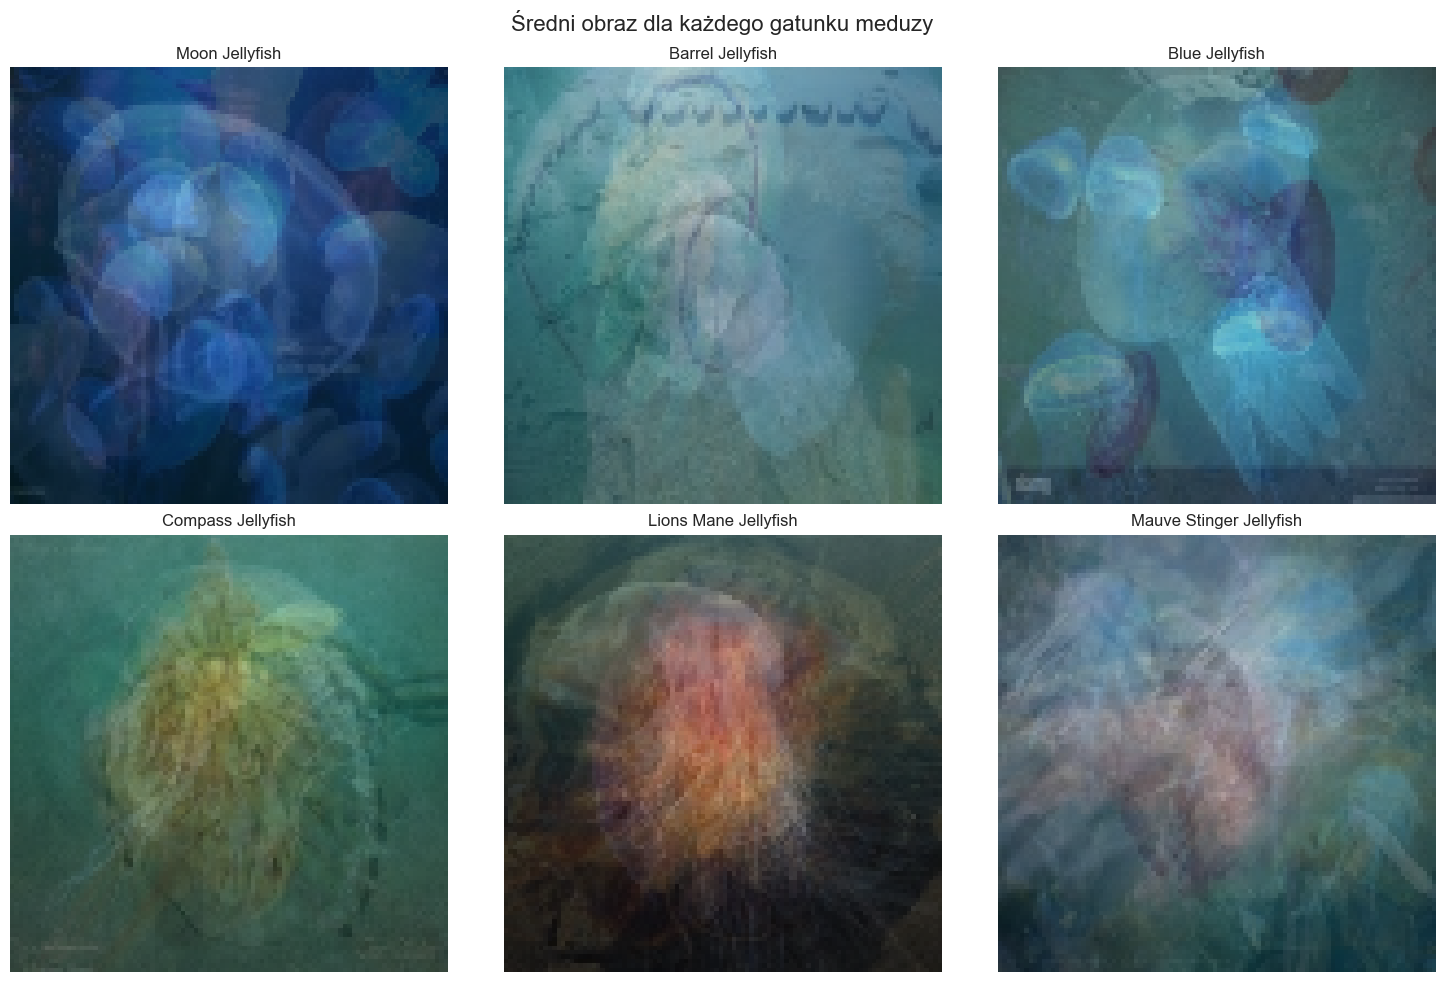

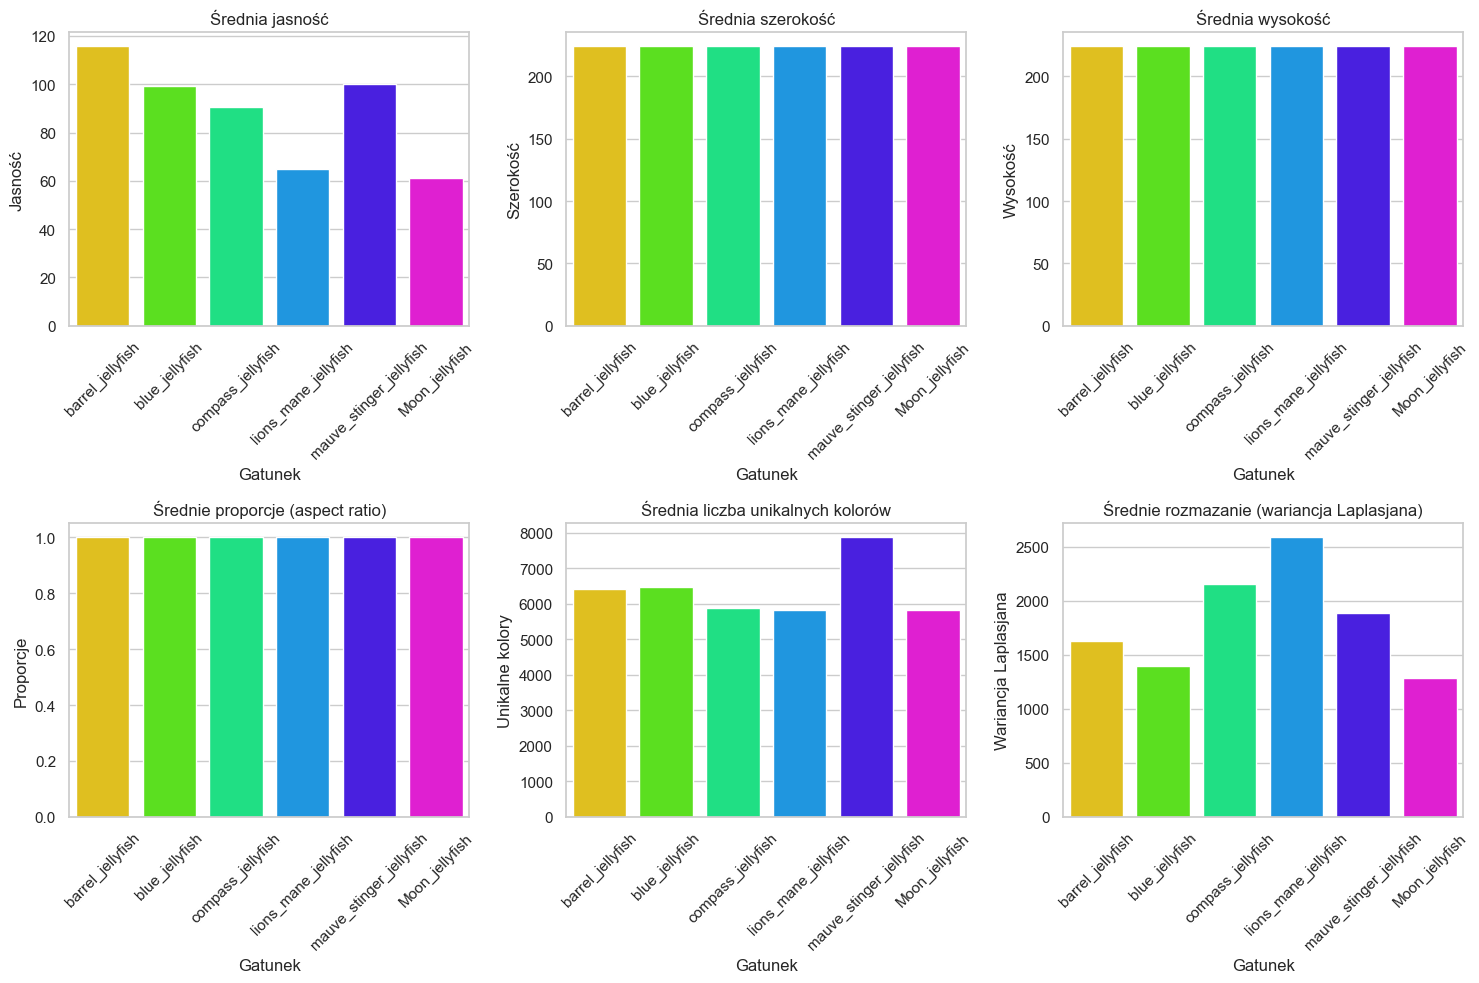

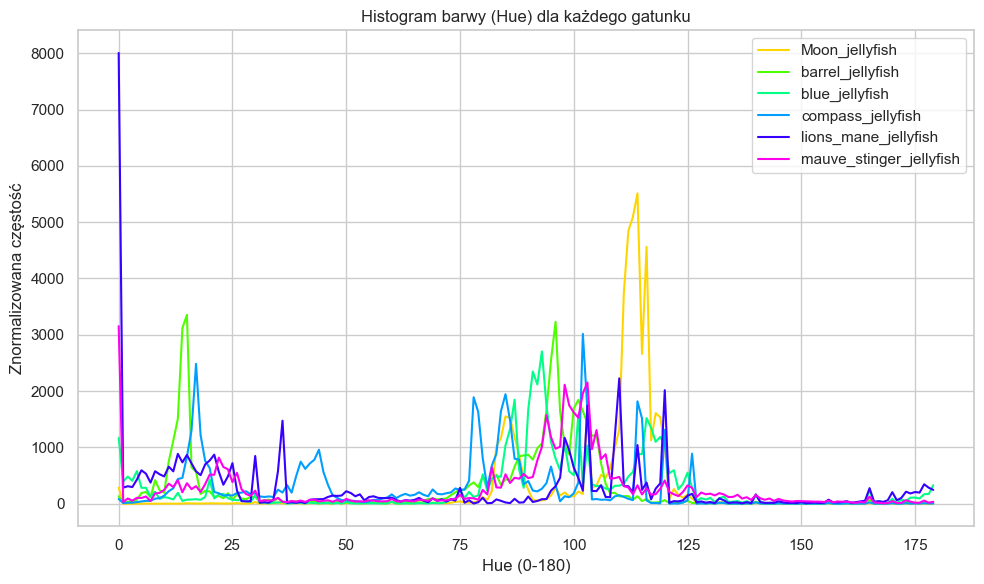

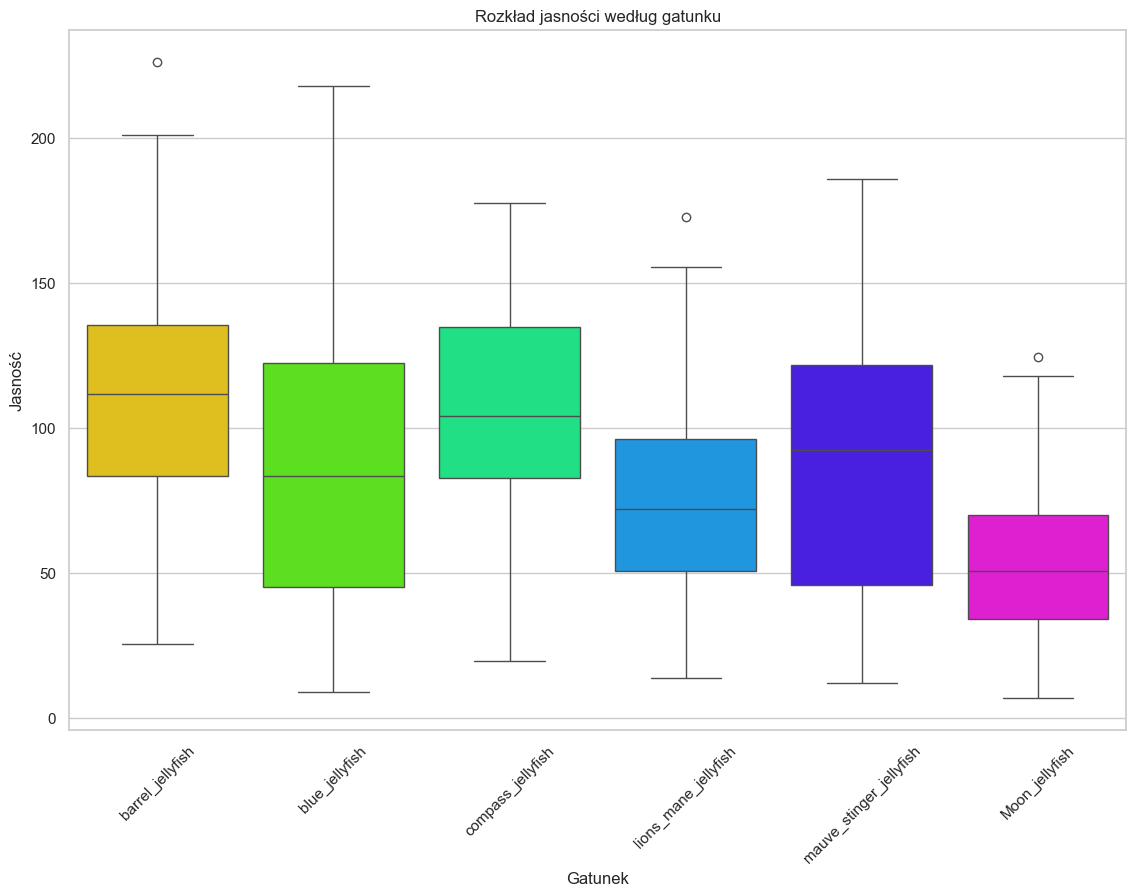

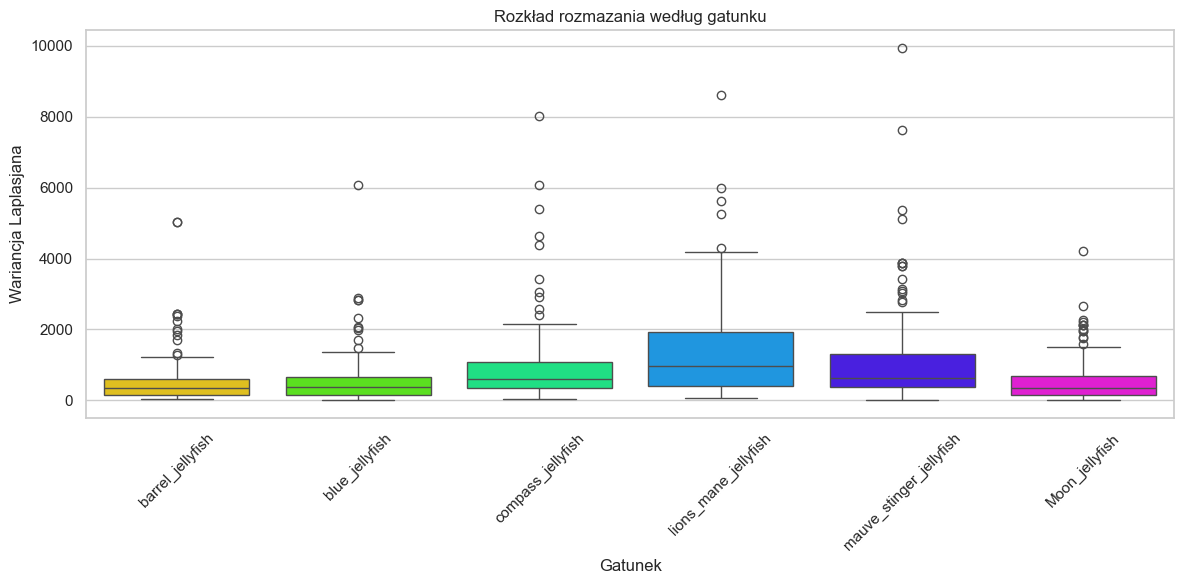


Statystyki szczeg√≥≈Çowe dla ka≈ºdej cechy wed≈Çug gatunku:


brightness                                    \
                               mean        std        min         max   
species                                                                 
Moon_jellyfish            54.441089  26.596361   6.755401  124.540418   
barrel_jellyfish         110.655136  35.270705  25.557916  226.297473   
blue_jellyfish            84.959683  47.736750   8.937480  217.779476   
compass_jellyfish        105.520409  34.650914  19.565210  177.558597   
lions_mane_jellyfish      75.912185  32.763451  13.798728  172.805365   
mauve_stinger_jellyfish   88.054083  45.215212  12.033084  185.819296   

                              width                           height  \
                               mean        std  min  max        mean   
species                                                                
Moon_jellyfish           210.944444  20.485186  179  224  210.944444   
barrel_jellyfish         209.000000  21.281523  179  224  209.000000   
blue_jellyfish           212.037975  19.942876  179  224  212.037975   
compass_jellyfish        212.821656  19.506246  179  224  212.821656   
lions_mane_jellyfish     212.396226  19.747783  179  224  212.396226   
mauve_stinger_jellyfish  212.475610  19.701593  179  224  212.475610   

                                             aspect_ratio                 \
                               std  min  max         mean  std  min  max   
species                                                                    
Moon_jellyfish           20.485186  179  224          1.0  0.0  1.0  1.0   
barrel_jellyfish         21.281523  179  224          1.0  0.0  1.0  1.0   
blue_jellyfish           19.942876  179  224          1.0  0.0  1.0  1.0   
compass_jellyfish        19.506246  179  224          1.0  0.0  1.0  1.0   
lions_mane_jellyfish     19.747783  179  224          1.0  0.0  1.0  1.0   
mauve_stinger_jellyfish  19.701593  179  224          1.0  0.0  1.0  1.0   

                                blur                                       
                                mean          std        min          max  
species                                                                    
Moon_jellyfish            556.454628   614.312925  24.547427  4221.199896  
barrel_jellyfish          535.015392   722.439212  28.676676  5038.260798  
blue_jellyfish            565.569759   709.902021  10.681421  6079.320627  
compass_jellyfish         920.995328  1087.102056  50.121651  8017.759666  
lions_mane_jellyfish     1379.779870  1337.291590  54.481960  8608.930092  
mauve_stinger_jellyfish  1115.585777  1330.226112   5.276148  9938.208383

In [92]:
#Podstawowe metryki obraz√≥w meduz z podzia≈Çem na klasy (zn√≥w ≈ºeby zobaczyƒá czy sƒÖ jakie≈õ widoczne r√≥≈ºnice)
import os
from pathlib import Path
from collections import defaultdict
from tqdm import tqdm

# Nowa ≈õcie≈ºka bazowa
base_path = Path("DATA/Backup")

# Wyszukanie wszystkich folder√≥w gatunk√≥w w Train, Test i Valid
species_dirs = [d for subset in base_path.iterdir() if subset.is_dir()
                for d in subset.iterdir() if d.is_dir()]
species_names = sorted(set(d.name for d in species_dirs))  # unikalne gatunki
print(f"Znaleziono {len(species_names)} unikalnych gatunk√≥w meduz: {species_names}")

metrics = defaultdict(dict)

colors = sns.color_palette("hsv", len(species_names))


for species_dir in tqdm(species_dirs, desc="Przetwarzanie gatunk√≥w"):
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    
    widths, heights, aspect_ratios, brightness_vals, unique_colors, blur_vals = [], [], [], [], [], []
    hsv_hist_total = np.zeros((180, 1))  # tylko hue do histogramu
    avg_image = None

    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            print(f"Nie mo≈ºna wczytaƒá obrazu: {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)  
        brightness_vals.append(np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

        # HSV histogram
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hist_hue = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        hsv_hist_total += hist_hue

        # ≈öredni obraz
        img = cv2.resize(img, (100, 100))  
        if avg_image is None:
            avg_image = np.zeros_like(img, dtype=np.float64)
        avg_image += img / len(image_paths)

        # Liczba unikalnych kolor√≥w
        unique_colors.append(len(np.unique(img.reshape(-1, 3), axis=0)))

        # Metryka rozmazania 
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        laplacian_var = cv2.Laplacian(gray_img, cv2.CV_64F).var()
        blur_vals.append(laplacian_var)

   
    metrics[species]['avg_width'] = np.mean(widths)
    metrics[species]['avg_height'] = np.mean(heights)
    metrics[species]['avg_aspect_ratio'] = np.mean(aspect_ratios)
    metrics[species]['avg_brightness'] = np.mean(brightness_vals)
    metrics[species]['avg_unique_colors'] = np.mean(unique_colors)
    metrics[species]['avg_blur'] = np.mean(blur_vals)  
    metrics[species]['hue_hist'] = hsv_hist_total / len(image_paths)
    metrics[species]['avg_image'] = avg_image.astype(np.uint8)


df_metrics = pd.DataFrame(metrics).T
df_metrics = df_metrics[['avg_width', 'avg_height', 'avg_aspect_ratio', 'avg_brightness', 'avg_unique_colors', 'avg_blur']]
print("\nTabela metryk:")
display(df_metrics)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, species in enumerate(species_names):
    axes[idx].imshow(metrics[species]['avg_image'])
    axes[idx].axis('off')
    axes[idx].set_title(species.replace("_", " ").title())
fig.suptitle("≈öredni obraz dla ka≈ºdego gatunku meduzy", fontsize=16)
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_brightness'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('≈örednia jasno≈õƒá')
plt.xlabel('Gatunek')
plt.ylabel('Jasno≈õƒá')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_width'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('≈örednia szeroko≈õƒá')
plt.xlabel('Gatunek')
plt.ylabel('Szeroko≈õƒá')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_height'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('≈örednia wysoko≈õƒá')
plt.xlabel('Gatunek')
plt.ylabel('Wysoko≈õƒá')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_aspect_ratio'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('≈örednie proporcje (aspect ratio)')
plt.xlabel('Gatunek')
plt.ylabel('Proporcje')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.barplot(x=df_metrics.index, y=df_metrics['avg_unique_colors'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('≈örednia liczba unikalnych kolor√≥w')
plt.xlabel('Gatunek')
plt.ylabel('Unikalne kolory')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)  
sns.barplot(x=df_metrics.index, y=df_metrics['avg_blur'], hue=df_metrics.index, palette=colors, legend=False)
plt.title('≈örednie rozmazanie (wariancja Laplasjana)')
plt.xlabel('Gatunek')
plt.ylabel('Wariancja Laplasjana')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#  Histogramy Hue (HSV) dla ka≈ºdego gatunku
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_names):
    plt.plot(metrics[species]['hue_hist'], label=species, color=colors[idx])
plt.title('Histogram barwy (Hue) dla ka≈ºdego gatunku')
plt.xlabel('Hue (0-180)')
plt.ylabel('Znormalizowana czƒôsto≈õƒá')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

data = []
for species_dir in species_dirs:
    species = species_dir.name
    image_paths = list(species_dir.glob("*.jpg"))
    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            print(f"Nie mo≈ºna wczytaƒá obrazu: {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]
        data.append({
            'species': species,
            'width': w,
            'height': h,
            'aspect_ratio': w / h,
            'brightness': np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)),
            'blur': cv2.Laplacian(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.CV_64F).var()  
        })

df_individual = pd.DataFrame(data)

plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='brightness', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozk≈Çad jasno≈õci wed≈Çug gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Jasno≈õƒá')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='blur', hue='species', data=df_individual, palette=colors, legend=False)
plt.title('Rozk≈Çad rozmazania wed≈Çug gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Wariancja Laplasjana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statystyki szczeg√≥≈Çowe
print("\nStatystyki szczeg√≥≈Çowe dla ka≈ºdej cechy wed≈Çug gatunku:")
stats = df_individual.groupby('species').agg({
    'brightness': ['mean', 'std', 'min', 'max'],
    'width': ['mean', 'std', 'min', 'max'],
    'height': ['mean', 'std', 'min', 'max'],
    'aspect_ratio': ['mean', 'std', 'min', 'max'],
    'blur': ['mean', 'std', 'min', 'max']  
})
display(stats)

#Hue reprezentuje odcie≈Ñ koloru, co jest bardziej intuicyjne ni≈º histogramy RGB w kontek≈õcie analizy kolorystycznej.
#Wizualizuje je na jednym wykresie, co pozwala por√≥wnaƒá rozk≈Çad kolor√≥w miƒôdzy gatunkami.

#≈öredni obraz: Kod generuje ≈õredni obraz dla ka≈ºdego gatunku, co jest unikalnƒÖ wizualizacjƒÖ, pomagajƒÖcƒÖ zobaczyƒá "typowy" wyglƒÖd meduzy danego gatunku.
#Liczba unikalnych kolor√≥w: Oblicza ≈õredniƒÖ liczbƒô unikalnych kolor√≥w, co mo≈ºe wskazywaƒá na r√≥≈ºnorodno≈õƒá kolorystycznƒÖ obraz√≥w.
#Tabela metryk: podsumowuje kluczowe cechy, co jest przydatne do dalszej analizy.
#Aspekt ratio: Oblicza ≈õrednie proporcje obraz√≥w, czyli stosunek szeroko≈õci do wysoko≈õci

Przetwarzanie obraz√≥w: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 956/956 [00:10<00:00, 90.20it/s]

Statystyki zbioru (bez podzia≈Çu na klasy):


width      height  aspect_ratio  brightness  unique_colors  \
count  956.000000  956.000000         956.0  956.000000     956.000000   
mean   211.620293  211.620293           1.0   86.383785    6070.489540   
std     20.106032   20.106032           0.0   42.036301    1835.821308   
min    179.000000  179.000000           1.0    6.755401    1537.000000   
25%    179.000000  179.000000           1.0   51.276223    4700.500000   
50%    224.000000  224.000000           1.0   83.532435    5975.000000   
75%    224.000000  224.000000           1.0  117.254439    7379.250000   
max    224.000000  224.000000           1.0  226.297473    9902.000000   

               blur  
count    956.000000  
mean    1676.489514  
std     1614.476292  
min       21.866674  
25%      625.462271  
50%     1192.091678  
75%     2152.679158  
max    12035.001968

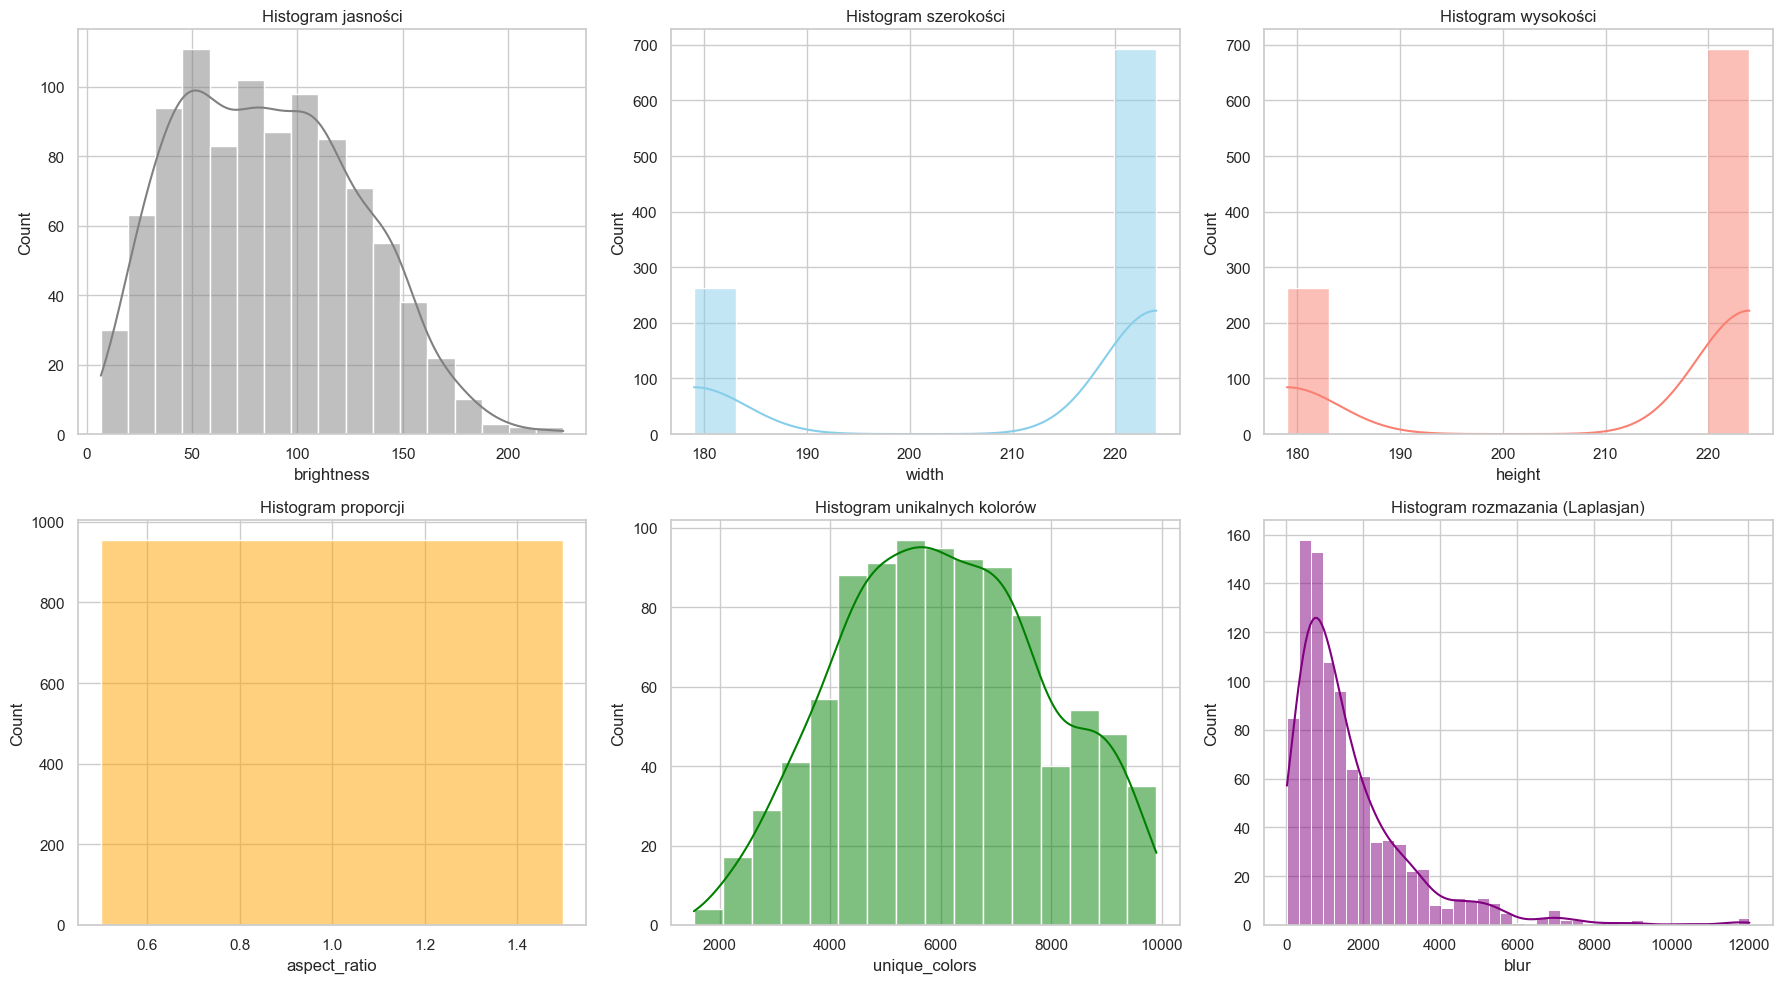

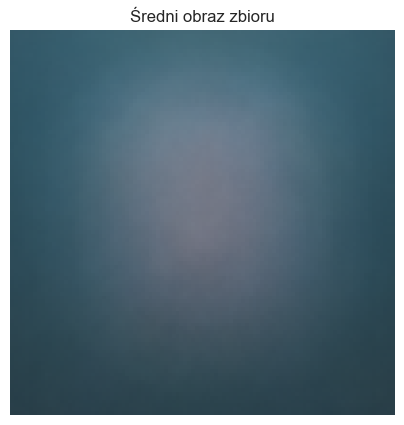

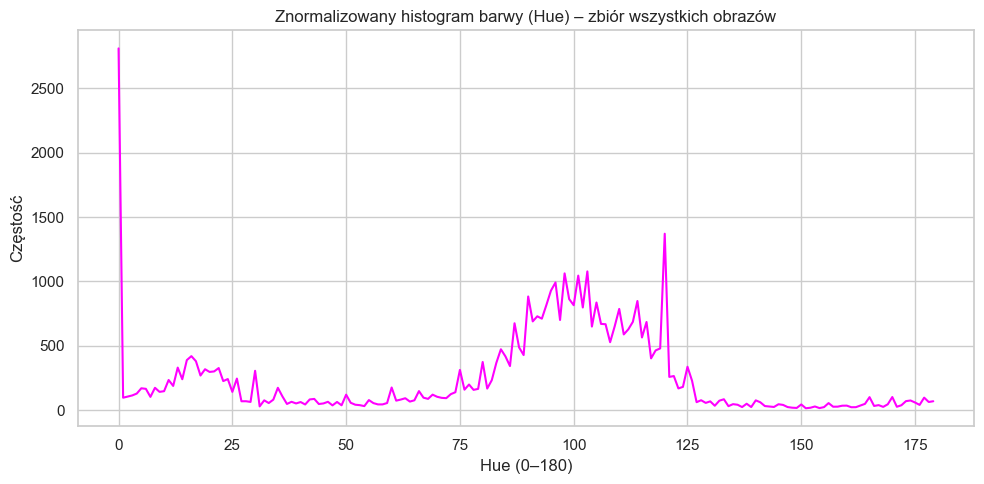

In [ ]:
#Podstawowe statystyki calego zbioru
train_path = 'DATA/Backup/Train'
test_path = 'DATA/Backup/Test'
valid_path = 'DATA/Backup/Valid'

# Zbieramy wszystkie pliki .jpg w podkatalogach dla wszystkich trzech zbior√≥w
image_paths = glob.glob(os.path.join(train_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(test_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(valid_path, '**', '*.jpg'), recursive=True)

# Inicjalizacja
widths, heights, aspect_ratios, brightness_vals, unique_colors, blur_vals = [], [], [], [], [], []
hue_hist_total = np.zeros((180, 1))
avg_image = None
count = 0

# Przetwarzanie obraz√≥w
for path in tqdm(image_paths, desc="Przetwarzanie obraz√≥w"):
    img = cv2.imread(str(path))
    if img is None:
        print(f"Nie mo≈ºna wczytaƒá obrazu: {path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)
    aspect_ratios.append(w / h)
    brightness_vals.append(np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

    # Histogram Hue
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hue_hist_total += cv2.calcHist([hsv], [0], None, [180], [0, 180])

    # ≈öredni obraz (przeskalowany)
    img_resized = cv2.resize(img, (100, 100))
    if avg_image is None:
        avg_image = np.zeros_like(img_resized, dtype=np.float64)
    avg_image += img_resized / len(image_paths)

    # Unikalne kolory
    unique_colors.append(len(np.unique(img_resized.reshape(-1, 3), axis=0)))

    # Rozmazanie
    gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    blur_vals.append(cv2.Laplacian(gray, cv2.CV_64F).var())

# Przekszta≈Çƒá ≈õredni obraz
avg_image = avg_image.astype(np.uint8)
hue_hist_total /= len(image_paths)

# Tworzymy ramkƒô danych i statystyki
df = pd.DataFrame({
    'width': widths,
    'height': heights,
    'aspect_ratio': aspect_ratios,
    'brightness': brightness_vals,
    'unique_colors': unique_colors,
    'blur': blur_vals
})

print("Statystyki zbioru (bez podzia≈Çu na klasy):")
display(df.describe())

# Wykresy
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['brightness'], kde=True, ax=axes[0, 0], color='gray').set_title('Histogram jasno≈õci')
sns.histplot(df['width'], kde=True, ax=axes[0, 1], color='skyblue').set_title('Histogram szeroko≈õci')
sns.histplot(df['height'], kde=True, ax=axes[0, 2], color='salmon').set_title('Histogram wysoko≈õci')
sns.histplot(df['aspect_ratio'], kde=True, ax=axes[1, 0], color='orange').set_title('Histogram proporcji')
sns.histplot(df['unique_colors'], kde=True, ax=axes[1, 1], color='green').set_title('Histogram unikalnych kolor√≥w')
sns.histplot(df['blur'], kde=True, ax=axes[1, 2], color='purple').set_title('Histogram rozmazania (Laplasjan)')

plt.tight_layout()
plt.show()

# ≈öredni obraz
plt.figure(figsize=(5, 5))
plt.imshow(avg_image)
plt.title("≈öredni obraz zbioru")
plt.axis('off')
plt.show()

# Histogram Hue
plt.figure(figsize=(10, 5))
plt.plot(hue_hist_total, color='magenta')
plt.title("Znormalizowany histogram barwy (Hue) ‚Äì zbi√≥r wszystkich obraz√≥w")
plt.xlabel("Hue (0‚Äì180)")
plt.ylabel("Czƒôsto≈õƒá")
plt.grid(True)
plt.tight_layout()
plt.show()

#wszystkie zdjecia sƒÖ kwadratowe (aspect ratio), niekt√≥re majƒÖ rozmiar 180x180 inne 220x220 wiƒôc zmienimy je do jednej wartosci podczas in≈ºynierii cech

### Do wykrywania anomalii we≈ºmiemy pod uwagƒô tylko 3 najwa≈ºniejsze cechy, kt√≥re sƒÖ zmienne, poniewa≈º:
- width i height:
width i height majƒÖ bardzo ma≈ÇƒÖ wariancjƒô, poniewa≈º obrazy zosta≈Çy przeskalowane do podobnych rozmiar√≥w (wszystkie sƒÖ kwadratowe, co potwierdza aspect_ratio). Te cechy nie sƒÖ u≈ºyteczne do wykrywania anomalii.
- aspect_ratio:
Proporcje sƒÖ zawsze r√≥wne 1.0 (wszystkie obrazy sƒÖ kwadratowe), a odchylenie standardowe wynosi 0.
aspect_ratio jest ca≈Çkowicie niezmienny i nie nadaje siƒô do wykrywania anomalii.
## Zatem interesujƒÖ nas:
- brightness:
- unique_colors:
- blur

In [ ]:
#Wykrywanie anomalii - Isolation Forest + Z-score
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

# üßÆ Oblicz unique_colors je≈õli nie istnieje
if 'unique_colors' not in df_individual.columns:
    unique_colors_list = []
    image_paths = list(Path("DATA/Train_Test_Valid").rglob("*.jpg"))
    for path in image_paths:
        img = cv2.imread(str(path))
        if img is None:
            unique_colors_list.append(np.nan)
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        unique_colors = len(np.unique(img.reshape(-1, 3), axis=0))
        unique_colors_list.append(unique_colors)
    df_individual['unique_colors'] = unique_colors_list[:len(df_individual)]

# üìä Dane wej≈õciowe
features = ['brightness', 'unique_colors', 'blur']
df_anomaly_input = df_individual[features].dropna().copy()

# üß™ Isolation Forest
iso_forest = IsolationForest(contamination=0.03, random_state=42)
iso_preds = iso_forest.fit_predict(df_anomaly_input)
df_anomaly_input['iso_pred'] = iso_preds  # -1 to anomalia

# üßÆ Z-score
z_scores = pd.DataFrame(zscore(df_anomaly_input[features]), columns=features, index=df_anomaly_input.index)
z_threshold = 4
z_anomaly_mask = (np.abs(z_scores) > z_threshold)

# ‚úçÔ∏è Dodaj opis przyczyn
def anomaly_reason(row):
    reasons = [f"{col} z={row[col]:.2f}" for col in features if abs(row[col]) > z_threshold]
    return ", ".join(reasons)

df_anomaly_input['z_anomaly'] = z_anomaly_mask.any(axis=1)
df_anomaly_input['anomaly_reason'] = z_scores.apply(anomaly_reason, axis=1)

# üìå Finalna filtracja: anomalia wg IsolationForest + odstajƒÖca wg z-score
df_anomalies = df_anomaly_input[(df_anomaly_input['iso_pred'] == -1) & (df_anomaly_input['z_anomaly'])].copy()
df_anomalies = df_anomalies.join(df_individual.loc[df_anomalies.index, ['species']])

# üìã Wyniki
print(f"\nüìå Wykryto {len(df_anomalies)} anomalii:\n")
for _, row in df_anomalies.iterrows():
    print(f"- Gatunek: {row['species']}, Jasno≈õƒá: {row['brightness']:.1f}, "
          f"Kolory: {row['unique_colors']}, Rozmazanie: {row['blur']:.1f}")
    print(f"  üîé Pow√≥d: {row['anomaly_reason']}\n")

# üëâ Alternatywnie (dla DataFrame):
display(df_anomalies[['species', 'brightness', 'unique_colors', 'blur', 'anomaly_reason']])

#Jest kilkana≈õcie obraz√≥w znacznie bardziej rozmytych od pozosta≈Çych, co mo≈ºe sugerowaƒá, ≈ºe sƒÖ to zdjƒôcia o niskiej jako≈õci lub ≈∫le wykonane



üìå Wykryto 12 anomalii:

- Gatunek: compass_jellyfish, Jasno≈õƒá: 148.2, Kolory: 32744, Rozmazanie: 6062.3
  üîé Pow√≥d: blur z=4.92

- Gatunek: blue_jellyfish, Jasno≈õƒá: 143.7, Kolory: 25127, Rozmazanie: 6079.3
  üîé Pow√≥d: blur z=4.93

- Gatunek: compass_jellyfish, Jasno≈õƒá: 146.5, Kolory: 22436, Rozmazanie: 8017.8
  üîé Pow√≥d: blur z=6.76

- Gatunek: compass_jellyfish, Jasno≈õƒá: 167.8, Kolory: 21315, Rozmazanie: 5411.4
  üîé Pow√≥d: blur z=4.30

- Gatunek: lions_mane_jellyfish, Jasno≈õƒá: 48.6, Kolory: 15826, Rozmazanie: 5268.8
  üîé Pow√≥d: blur z=4.17

- Gatunek: lions_mane_jellyfish, Jasno≈õƒá: 38.9, Kolory: 15920, Rozmazanie: 6000.8
  üîé Pow√≥d: blur z=4.86

- Gatunek: lions_mane_jellyfish, Jasno≈õƒá: 58.3, Kolory: 21597, Rozmazanie: 8608.9
  üîé Pow√≥d: blur z=7.32

- Gatunek: lions_mane_jellyfish, Jasno≈õƒá: 126.4, Kolory: 37794, Rozmazanie: 5611.8
  üîé Pow√≥d: blur z=4.49

- Gatunek: mauve_stinger_jellyfish, Jasno≈õƒá: 45.9, Kolory: 17468, Rozmazanie: 5367.7

species  brightness  unique_colors         blur  \
12         compass_jellyfish  148.177595          32744  6062.294585   
216           blue_jellyfish  143.743722          25127  6079.320627   
347        compass_jellyfish  146.469448          22436  8017.759666   
393        compass_jellyfish  167.781062          21315  5411.444477   
516     lions_mane_jellyfish   48.620596          15826  5268.831167   
561     lions_mane_jellyfish   38.860866          15920  6000.805336   
569     lions_mane_jellyfish   58.273556          21597  8608.930092   
582     lions_mane_jellyfish  126.422891          37794  5611.773277   
638  mauve_stinger_jellyfish   45.882314          17468  5367.710379   
661  mauve_stinger_jellyfish  178.971819          31433  5118.459805   
688  mauve_stinger_jellyfish   51.409070          21204  7627.607785   
752  mauve_stinger_jellyfish   57.877969          24305  9938.208383   

    anomaly_reason  
12     blur z=4.92  
216    blur z=4.93  
347    blur z=6.76  
393    blur z=4.30  
516    blur z=4.17  
561    blur z=4.86  
569    blur z=7.32  
582    blur z=4.49  
638    blur z=4.26  
661    blur z=4.03  
688    blur z=6.39  
752    blur z=8.57

In [1]:
#Weryfikacja poprawnosci zdjƒôƒá - sprawdzenie rozmiaru, wczytania, wymiar√≥w, liczby kana≈Ç√≥w, warto≈õci pikseli, rozmiaru pliku w stosunku do wymiar√≥w

from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# üìä Ustawienia wy≈õwietlania Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# üìã Lista problematycznych plik√≥w
problematic_files = []

# üìÇ Foldery zbior√≥w
base_dirs = ["DATA/Train_Test_Valid/Train", "DATA/Train_Test_Valid/Valid", "DATA/Train_Test_Valid/Test"]

# üîÅ Iteracja przez wszystkie podkatalogi datasetu
for base_dir in base_dirs:
    base_path = Path(base_dir)
    species_dirs = [d for d in base_path.iterdir() if d.is_dir()]
    
    for species_dir in tqdm(species_dirs, desc=f"Przetwarzanie: {base_dir}"):
        species = species_dir.name
        image_paths = list(species_dir.glob("*.jpg"))

        for path in image_paths:
            file_size = path.stat().st_size
            if file_size == 0:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Zerowy rozmiar pliku'
                })
                continue

            img = cv2.imread(str(path))
            if img is None:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Nie mo≈ºna wczytaƒá obrazu (uszkodzony plik)'
                })
                continue

            h, w = img.shape[:2]
            if h == 0 or w == 0:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Obraz ma zerowe wymiary'
                })
                continue

            if len(img.shape) != 3 or img.shape[2] != 3:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': 'Nieprawid≈Çowa liczba kana≈Ç√≥w (obraz nie jest RGB)'
                })
                continue

            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            mean_brightness = np.mean(gray_img)
            if mean_brightness < 10 or mean_brightness > 245:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': f'Nietypowe warto≈õci pikseli (≈õrednia jasno≈õƒá: {mean_brightness:.2f})'
                })
                continue

            expected_size = (h * w * 3) / 1024  # w KB
            if file_size < expected_size * 0.1:
                problematic_files.append({
                    'set': base_dir.split("/")[-1],
                    'species': species,
                    'path': str(path),
                    'issue': f'Zbyt ma≈Çy rozmiar pliku ({file_size:.2f} B) w stosunku do ({w}x{h})'
                })

# üìä Wynik
df_problematic = pd.DataFrame(problematic_files)
print("\nüìã Problematyczne pliki:")
if not df_problematic.empty:
    print(df_problematic)
else:
    print("‚úÖ Nie znaleziono problematycznych plik√≥w.")



Przetwarzanie: DATA/Train_Test_Valid/Test: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:00<00:00, 153.69it/s]


üìã Problematyczne pliki:
     set         species  \
0  Train  blue_jellyfish   
1  Train  blue_jellyfish   
2  Train  Moon_jellyfish   

                                                       path  \
0   DATA\Train_Test_Valid\Train\blue_jellyfish\aug-6-09.jpg   
1  DATA\Train_Test_Valid\Train\blue_jellyfish\aug-62-11.jpg   
2  DATA\Train_Test_Valid\Train\Moon_jellyfish\aug-90-56.jpg   

                                                issue  
0  Nietypowe warto≈õci pikseli (≈õrednia jasno≈õƒá: 9.07)  
1  Nietypowe warto≈õci pikseli (≈õrednia jasno≈õƒá: 9.98)  
2  Nietypowe warto≈õci pikseli (≈õrednia jasno≈õƒá: 6.77)  



Redukcja wymiarowo≈õci (PCA) i wizualizacja danych...


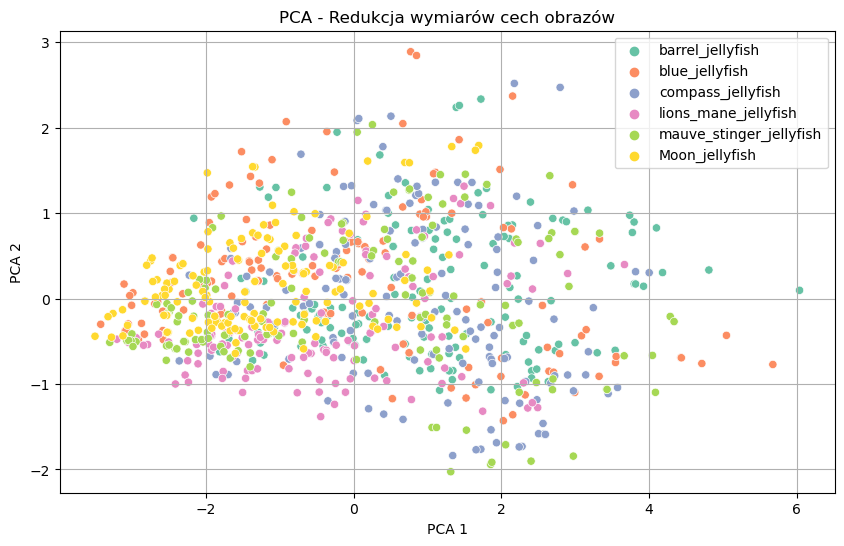

In [18]:
print("\nRedukcja wymiarowo≈õci (PCA) i wizualizacja danych...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title("PCA - Redukcja wymiar√≥w cech obraz√≥w")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
"""
üß† Czym jest PCA (Principal Component Analysis)?
PCA to metoda redukcji wymiarowo≈õci, kt√≥ra:

szuka nowych osi, wzd≈Çu≈º kt√≥rych dane najbardziej siƒô ‚ÄûrozciƒÖgajƒÖ‚Äù,

przekszta≈Çca dane do przestrzeni o mniejszej liczbie wymiar√≥w (np. 2D),

PCA 1 to o≈õ, kt√≥ra najlepiej r√≥≈ºnicuje dane,

PCA 2 to druga, prostopad≈Ça o≈õ z kolejnƒÖ najwiƒôkszƒÖ wariancjƒÖ.

üìà Jak czytaƒá wykres PCA:
Ka≈ºdy punkt to jeden obraz meduzy (po przetworzeniu na cechy).

Pozycja punktu pokazuje, jak r√≥≈ºni siƒô wizualnie od innych (np. kolorem, jasno≈õciƒÖ).

Je≈õli punkty tego samego gatunku sƒÖ blisko siebie i daleko od innych, to znaczy, ≈ºe gatunki sƒÖ rozr√≥≈ºnialne wizualnie.

Je≈õli wszystko siƒô miesza ‚Äî potrzebujemy lepszych cech
"""